<a href="https://colab.research.google.com/github/FasihZ/FasihZ/blob/main/CS526_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-cs526/diabetes.csv


In [ ]:
#For the attributes Glucose, BloodPressure, SkinThickness, Insulin, and BMI, a value of 0 is used asan indicator of missing data.
import pandas as pd
df = pd.read_csv('/kaggle/input/diabetes-cs526/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
missing_values_df = df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) |
                       (df['SkinThickness'] == 0) | (df['Insulin'] == 0) |
                       (df['BMI'] == 0)]
missing_values_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#We are now replacing 0 with NA to make things simpler.
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,<NA>,33.6,0.627,50,1
1,1,85,66,29,<NA>,26.6,0.351,31,0
2,8,183,64,<NA>,<NA>,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,<NA>,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,<NA>,<NA>,30.1,0.349,47,1


In [ ]:
df['missing_count'] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isna().sum(axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,missing_count
0,6,148,72,35,<NA>,33.6,0.627,50,1,1
1,1,85,66,29,<NA>,26.6,0.351,31,0,1
2,8,183,64,<NA>,<NA>,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,<NA>,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,<NA>,<NA>,30.1,0.349,47,1,2


In [ ]:
#Now I will count the number of missing values for each of those 5 attributes in each record or row.
#That is what value.counts does--shows how  missing counts are distributes.
missing_values_summary = df['missing_count'].value_counts()
missing_values_summary

missing_count
0    392
2    199
1    142
3     28
4      7
Name: count, dtype: int64

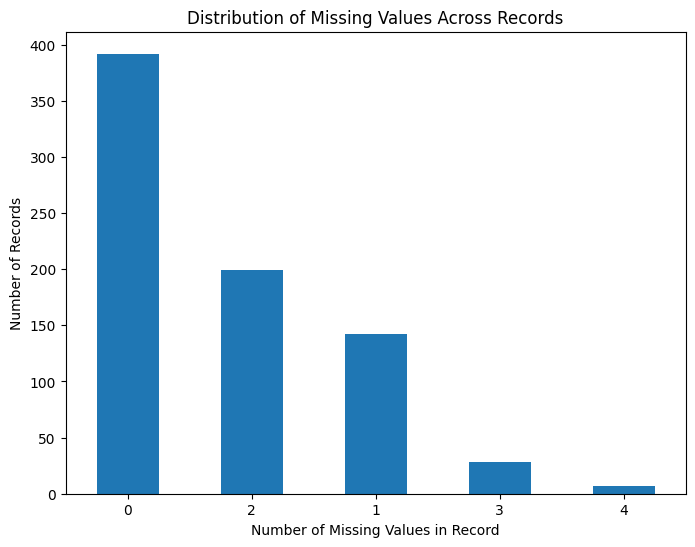

In [ ]:
import matplotlib.pyplot as plt
#Now I will make the plots.
plt.figure(figsize=(8, 6))
missing_values_summary.plot(kind='bar')
plt.xlabel('Number of Missing Values in Record')
plt.ylabel('Number of Records')
plt.title('Distribution of Missing Values Across Records')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

In [ ]:
#Q1 (b)
#The steps here are simple. How do you first see how many missing values are for the outcome 0? Use value counts again.
class_0 = df[df['Outcome'] == 0]['missing_count'].value_counts()
class_0
#So only 262 rows with outcome 0 have no missing attributes. 6 records have all missing records.

missing_count
0    262
2    124
1     95
3     13
4      6
Name: count, dtype: int64

In [ ]:
#Do the same for class 1.
class_1 = df[df['Outcome'] == 1]['missing_count'].value_counts()
class_1
#Outcome 1 has generally much less frequency.

missing_count
0    130
2     75
1     47
3     15
4      1
Name: count, dtype: int64

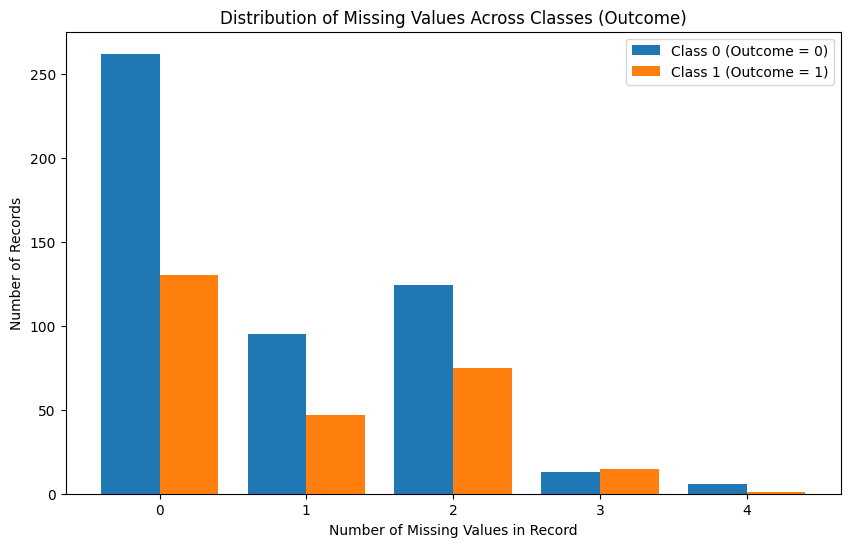

In [ ]:
#now on to plotting.
plt.figure(figsize=(10, 6))
plt.bar(class_0.index - 0.2, class_0.values, width=0.4, label='Class 0 (Outcome = 0)', align='center')
plt.bar(class_1.index + 0.2, class_1.values, width=0.4, label='Class 1 (Outcome = 1)', align='center')

# Label the plot
plt.xlabel('Number of Missing Values in Record')
plt.ylabel('Number of Records')
plt.title('Distribution of Missing Values Across Classes (Outcome)')
plt.legend()
plt.xticks(range(max(class_0.index.max(), class_1.index.max()) + 1))  # Ensure x-axis covers all possible values
plt.show()

#We can see that outcome 0 dominates 1 in frequency in all cases apart from 3 missing attributes records.

In [ ]:
#Part C: this one needs a bit more work since we have to evalaute each attribute. Also, for this, I took extensive help from ChatGPT.
import numpy as np

# Since 0 represents missing values in the dataset for specific columns
columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Initialize an empty DataFrame to store the conditional probabilities
conditional_prob_df = pd.DataFrame(index=columns_with_missing, columns=columns_with_missing)

In [ ]:
# Now we shall compute P(X = 0 | Y = 0) for each pair of attributes
#I will convert the

columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[columns_with_missing] = df[columns_with_missing].fillna(0)

conditional_prob_df = pd.DataFrame(index=columns_with_missing, columns=columns_with_missing)

# Calculate P(X = 0 | Y = 0) for each pair of attributes
for x in columns_with_missing:
    for y in columns_with_missing:
        # Count the number of records where Y = 0
        y_zero_count = (df[y] == 0).sum()

        if y_zero_count > 0:
            # Count the number of records where both X = 0 and Y = 0
            xy_zero_count = ((df[x] == 0) & (df[y] == 0)).sum()

            # Compute the conditional probability P(X = 0 | Y = 0)
            conditional_prob_df.loc[x, y] = xy_zero_count / y_zero_count
        else:
            conditional_prob_df.loc[x, y] = np.nan  # No records where Y = 0


In [ ]:
conditional_prob_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,1.0,0.0,0.0,0.010695,0.0
BloodPressure,0.0,1.0,0.145374,0.093583,0.636364
SkinThickness,0.0,0.942857,1.0,0.606952,0.818182
Insulin,0.8,1.0,1.0,1.0,0.909091
BMI,0.0,0.2,0.039648,0.026738,1.0
